<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [2108]:
import pandas as pd
import psycopg2

In [2109]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [2110]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [2111]:
# текст запроса
query_3_1 = f'''select count(*)
from vacancies
'''

In [2112]:
df=pd.read_sql_query(query_3_1, connection)
display(df)

C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\306643106.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_3_1, connection)


,count
0,49197


In [2113]:
# результат запроса

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [2114]:
# текст запроса
query_3_2 = f'''select count(*)
from employers
'''
dfe=pd.read_sql_query(query_3_2, connection)
print(dfe)

   count
0  23501


C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\2947126609.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfe=pd.read_sql_query(query_3_2, connection)


In [2115]:
# результат запроса

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [2116]:
# текст запроса
query_3_3 = f'''select count(*)
from areas
'''
dfa=pd.read_sql_query(query_3_3, connection)
print(dfa)

   count
0   1362


C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\1019051366.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfa=pd.read_sql_query(query_3_3, connection)


In [2117]:
# результат запроса

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [2118]:
# текст запроса
query_3_4 = f'''select count(*)
from industries
'''
dfi=pd.read_sql_query(query_3_4, connection)
print(dfi)

   count
0    294


C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\3919168363.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfi=pd.read_sql_query(query_3_4, connection)


In [2119]:
# результат запроса

***

In [2120]:
# выводы по предварительному анализу данных

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [2121]:
# текст запроса
query_3_5 = f'''select a.name as area_name, count(v.id) as cnt
from areas a
join vacancies v ON a.id=v.area_id
group by a.name
order by cnt desc
'''
df_by_area=pd.read_sql_query(query_3_5, connection)
print(df_by_area)

C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\2495048785.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_by_area=pd.read_sql_query(query_3_5, connection)


           area_name   cnt
0             Москва  5333
1    Санкт-Петербург  2851
2              Минск  2112
3        Новосибирск  2006
4             Алматы  1892
..               ...   ...
764       Тарко-Сале     1
765    Новоаннинский     1
766            Бирск     1
767           Сасово     1
768             Анна     1

[769 rows x 2 columns]


In [2122]:
# результат запроса

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [2123]:
# текст запроса
query_3_6 = f'''select count(*)
from vacancies
where salary_to is not Null or salary_from is not null
'''
df_salary=pd.read_sql_query(query_3_6, connection)
print(df_salary)

   count
0  24073


C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\2636027626.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salary=pd.read_sql_query(query_3_6, connection)


In [2124]:
# результат запроса

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [2125]:
# текст запроса
query_3_7 = f'''select round(avg(salary_from)) as average_salary_from, round(avg(salary_to)) as average_salary_to
from vacancies
where salary_to is not Null or salary_from is not null
'''
df_salary_folk=pd.read_sql_query(query_3_7, connection)
print(df_salary_folk)

   average_salary_from  average_salary_to
0              71065.0           110537.0


C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\1706312933.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salary_folk=pd.read_sql_query(query_3_7, connection)


In [2126]:
# результат запроса

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [2127]:
# текст запроса
query_3_8 = f'''select schedule, employment, count(*) as vacancy_count
from vacancies
group by schedule, employment
order by vacancy_count desc
'''
df_schedule_employment=pd.read_sql_query(query_3_8, connection)
print(df_schedule_employment)

            schedule           employment  vacancy_count
0        Полный день     Полная занятость          35367
1   Удаленная работа     Полная занятость           7802
2      Гибкий график     Полная занятость           1593
3   Удаленная работа  Частичная занятость           1312
4     Сменный график     Полная занятость            940
5        Полный день           Стажировка            569
6     Вахтовый метод     Полная занятость            367
7        Полный день  Частичная занятость            347
8      Гибкий график  Частичная занятость            312
9        Полный день     Проектная работа            141
10  Удаленная работа     Проектная работа            133
11     Гибкий график           Стажировка            116
12    Сменный график  Частичная занятость            101
13  Удаленная работа           Стажировка             64
14     Гибкий график     Проектная работа             18
15    Сменный график           Стажировка             12
16    Вахтовый метод     Проект

C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\3063345566.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_schedule_employment=pd.read_sql_query(query_3_8, connection)


In [2128]:
# результат запроса

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [2129]:
# текст запроса
query_3_9 = f'''select experience, count(*) as vacancy_count
from vacancies
where experience is not null
group by experience
order by vacancy_count asc
'''
df_experience=pd.read_sql_query(query_3_9, connection)
print(df_experience)

C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\1029523279.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_experience=pd.read_sql_query(query_3_9, connection)


           experience  vacancy_count
0         Более 6 лет           1337
1           Нет опыта           7197
2       От 3 до 6 лет          14511
3  От 1 года до 3 лет          26152


In [2130]:
# результат запроса

***

In [2131]:
# выводы по детальному анализу вакансий

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [2132]:
# текст запроса
query_3_10= f'''select e.name as employers_name, count(v.id) as cnt
from employers e
join vacancies v ON e.id=v.employer_id
group by e.name
order by cnt desc
'''
df_employers=pd.read_sql_query(query_3_10, connection)
print(df_employers.iloc[[0,4]])

C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\2596534333.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employers=pd.read_sql_query(query_3_10, connection)


  employers_name   cnt
0         Яндекс  1933
4  Газпром нефть   331


In [2133]:
# результат запроса


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [2134]:
# текст запроса
query_3_11= f'''
SELECT
    a.name AS region,
    COUNT(DISTINCT e.id) AS employers_count,
    COUNT(DISTINCT v.id) AS vacancies_count
FROM
    areas a
LEFT JOIN employers e ON a.id = e.area
LEFT JOIN vacancies v ON a.id = v.area_id
GROUP BY
    a.id, a.name
ORDER BY
    employers_count DESC, region;
'''
df_employers_count=pd.read_sql_query(query_3_11, connection)
print(df_employers_count)
print(df_employers_count.iloc[0])
#Having
#    count(v.id)=0

C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\84932848.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employers_count=pd.read_sql_query(query_3_11, connection)


                            region  employers_count  vacancies_count
0                           Москва             5864             5333
1                  Санкт-Петербург             2217             2851
2                            Минск             1115             2112
3                           Алматы              721             1892
4                     Екатеринбург              609             1698
...                            ...              ...              ...
1357                        Ярцево                0                2
1358                     Ясногорск                0                2
1359  Ясный (Оренбургская область)                0                0
1360                        Яшкино                0                0
1361                            Яя                0                1

[1362 rows x 3 columns]
region             Москва
employers_count      5864
vacancies_count      5333
Name: 0, dtype: object


In [2135]:
# результат запроса

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [2136]:
# текст запроса
query_3_12= f'''
SELECT
    e.name AS employer_name,
    COUNT(DISTINCT v.area_id) AS regions_count
FROM
    employers e
LEFT JOIN vacancies v ON e.id = v.employer_id
GROUP BY
    e.id, e.name
ORDER BY
    regions_count DESC;
'''
df_employers_public_vacancies=pd.read_sql_query(query_3_12, connection)
print(df_employers_public_vacancies)

C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\3229663590.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employers_public_vacancies=pd.read_sql_query(query_3_12, connection)


                employer_name  regions_count
0                      Яндекс            181
1                  Ростелеком            152
2                  Спецремонт            116
3      Поляков Денис Иванович             88
4                   ООО ЕФИН              71
...                       ...            ...
23496              Но Смокинг              0
23497        МАСТЕРСКАЯ CREED              0
23498           Dzing Finance              0
23499                    КОРС              0
23500             Наука-Связь              0

[23501 rows x 2 columns]


In [2137]:
# результат запроса

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [2138]:
# текст запроса
query_3_13= f'''
SELECT
 count(e.id) as employers_without_industries
FROM
    employers e
Left Join employers_industries ei on e.id=ei.employer_id 
Where
    ei.industry_id is null or ei.industry_id = ''
'''
df_employers_without_industries=pd.read_sql_query(query_3_13, connection)
print(df_employers_without_industries)

   employers_without_industries
0                          8419


C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\1372283548.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employers_without_industries=pd.read_sql_query(query_3_13, connection)


In [2139]:
# результат запроса

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [2140]:
# текст запроса
query_3_14=f'''
SELECT
    e.name AS company_name
FROM
    employers e
JOIN (
    SELECT
        employer_id
    FROM
        employers_industries
    GROUP BY
        employer_id
    HAVING
        COUNT(DISTINCT industry_id) = 4
    ORDER BY
        employer_id
) subquery ON e.id = subquery.employer_id
ORDER BY
    company_name
OFFSET 2
LIMIT 1;
'''
df_3_14=pd.read_sql_query(query_3_14, connection)
display(df_3_14)

C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\3627624217.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_14=pd.read_sql_query(query_3_14, connection)


,company_name
0,2ГИС


In [2141]:
# результат запроса

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [2142]:
# текст запроса
query_3_15=f'''
SELECT
    COUNT(DISTINCT employer_id) AS employers_count
FROM
    employers_industries
WHERE
    industry_id IN (
        SELECT
            id
        FROM
            industries
        WHERE
            name = 'Разработка программного обеспечения'
    );
'''
df_3_15=pd.read_sql_query(query_3_15, connection)
display(df_3_15)

C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\2279666406.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_15=pd.read_sql_query(query_3_15, connection)


,employers_count
0,3553


In [2143]:
# результат запроса

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [2144]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Загрузка данных о городах-миллионниках
url_million_cities = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8#%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D0%BE%D0%B2'
response = requests.get(url_million_cities)
soup = BeautifulSoup(response.text, 'html.parser')

# Извлечение списка городов-миллионников
table = soup.find('table', class_='standard')
cities_million = [row.find_all('td')[1].text.strip() for row in table.find_all('tr')[1:]]

# Запрос для получения информации о компаниях Яндекс и количестве вакансий в указанных городах
query_yandex_vacancies = f"""
    SELECT a.name as name, COUNT(*) as cnt
    FROM vacancies v
    JOIN areas a ON v.area_id = a.id
    JOIN employers e ON v.employer_id = e.id
    WHERE e.name = 'Яндекс' AND a.name IN ({','.join(['%s']*len(cities_million))})
    GROUP BY a.name
    order by cnt desc
"""

# Загрузка данных в DataFrame
df_yandex_vacancies = pd.read_sql_query(query_yandex_vacancies, connection, params=cities_million)

# Добавление строки Total
df_yandex_vacancies.loc['Total'] = ['Total', df_yandex_vacancies['cnt'].sum()]

# Вывод результата
print(df_yandex_vacancies)


                  name  cnt
0               Москва   54
1      Санкт-Петербург   42
2         Екатеринбург   39
3      Нижний Новгород   36
4          Новосибирск   35
5              Воронеж   32
6            Краснодар   30
7               Самара   26
8                  Уфа   26
9               Казань   25
10               Пермь   25
11      Ростов-на-Дону   25
12           Волгоград   24
13          Красноярск   23
14           Челябинск   22
15                Омск   21
Total            Total  485


C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\790487078.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_yandex_vacancies = pd.read_sql_query(query_yandex_vacancies, connection, params=cities_million)


In [2145]:
# текст запроса

In [2146]:
# результат запроса

***

In [2147]:
# выводы по анализу работодателей

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [2148]:
# текст запроса
import pandas as pd
query_3_17=f'''
SELECT COUNT(*) as data_related_count
FROM vacancies
WHERE LOWER(name) LIKE '%data%' OR LOWER(name) LIKE '%данн%'
'''
df_data_science=pd.read_sql_query(query_3_17, connection)
display(df_data_science)

C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\2453573717.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_data_science=pd.read_sql_query(query_3_17, connection)


,data_related_count
0,1771


In [2149]:
# результат запроса

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [2150]:
# текст запроса
query_3_18=f'''
SELECT COUNT(*) as junior_data_scientist_count
FROM vacancies
WHERE (LOWER(name) LIKE '%data scientist%' 
        OR LOWER(name) LIKE '%data science%'
        OR LOWER(name) LIKE '%исследователь данных%'
        OR LOWER(name) LIKE '%machine learning%'
        OR LOWER(name) LIKE '%машинн%обучен%'
        OR LOWER(name) LIKE '%ml%' and LOWER(name) NOT LIKE '%html%')
    AND (LOWER(name) LIKE '%junior%'
        OR LOWER(experience) LIKE '%нет опыта%'
        OR LOWER(employment) LIKE '%стажировка%');
        '''
df_junior=pd.read_sql_query(query_3_18,connection)
display(df_junior)

C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\2112081206.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_junior=pd.read_sql_query(query_3_18,connection)


,junior_data_scientist_count
0,51


In [2151]:
# результат запроса

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [2152]:
# текст запроса
query_3_19=f'''
SELECT COUNT(*) as data_scientist_count_skills
FROM vacancies
WHERE (LOWER(name) LIKE '%data scientist%' 
        OR LOWER(name) LIKE '%data science%'
        OR LOWER(name) LIKE '%исследователь данных%'
        OR LOWER(name) LIKE '%machine learning%'
        OR LOWER(name) LIKE '%машинн%обучен%'
        OR name LIKE '%ML%' and name NOT LIKE '%HTML%')
        AND (LOWER(key_skills) LIKE '%sql%' OR LOWER(key_skills) LIKE '%postgres%')
        '''
df_ds_skills=pd.read_sql_query(query_3_19,connection)
display(df_ds_skills)

C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\1180549610.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ds_skills=pd.read_sql_query(query_3_19,connection)


,data_scientist_count_skills
0,201


In [2153]:
# результат запроса

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [2154]:
# текст запроса
query_3_20=f'''
SELECT COUNT(*) as data_scientist_count_python
FROM vacancies
WHERE (LOWER(name) LIKE '%data scientist%' 
        OR LOWER(name) LIKE '%data science%'
        OR LOWER(name) LIKE '%исследователь данных%'
        OR LOWER(name) LIKE '%machine learning%'
        OR LOWER(name) LIKE '%машинн%обучен%'
        OR name LIKE '%ML%' and name NOT LIKE '%HTML%')
        AND (LOWER(key_skills) LIKE '%python%')
        '''
df_ds_python=pd.read_sql_query(query_3_20,connection)
display(df_ds_python)

C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\3547565975.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ds_python=pd.read_sql_query(query_3_20,connection)


,data_scientist_count_python
0,351


In [2155]:
# результат запроса

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [2168]:
# текст запроса

query_6_5=f'''
SELECT round(avg(length(key_skills)-length(replace(key_skills, CHR(9), ''))+1),2)
FROM vacancies
WHERE (
        LOWER(name) LIKE '%data scientist%' 
        OR LOWER(name) LIKE '%data science%'
        OR LOWER(name) LIKE '%исследователь данных%'
        OR LOWER(name) LIKE '%машинн%обучен%'
        OR LOWER(name) LIKE '%machine learning%'
        OR name LIKE '%ML%' and name NOT LIKE '%HTML%'
) 
'''
df_total_skills=pd.read_sql_query(query_6_5, connection)
print(df_total_skills)


C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\2141735912.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_total_skills=pd.read_sql_query(query_6_5, connection)


   round
0   6.41


In [ ]:
# результат запроса

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [ ]:
# текст запроса
query_3_22=f'''
SELECT 
  experience,
  AVG(
    CASE 
      WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL THEN (salary_from + salary_to) / 2
      WHEN salary_from IS NOT NULL THEN salary_from
      WHEN salary_to IS NOT NULL THEN salary_to
      ELSE 0
    END
 ) AS avg_salary
FROM 
  vacancies
WHERE 
  (
    salary_from IS NOT NULL OR 
    salary_to IS NOT NULL
  ) AND 
  (
   LOWER(name) LIKE '%data scientist%' 
        OR LOWER(name) LIKE '%data science%'
        OR LOWER(name) LIKE '%исследователь данных%'
        OR LOWER(name) LIKE '%машинн%обучен%'
        OR LOWER(name) LIKE '%machine learning%'
        OR name LIKE '%ML%' and name NOT LIKE '%HTML%'
)
GROUP BY 
  experience;
'''
df_salary_ds=pd.read_sql_query(query_3_22,connection)
print(df_salary_ds)
#connection.close()

           experience     avg_salary
0           Нет опыта   74642.857143
1  От 1 года до 3 лет  139674.750000
2       От 3 до 6 лет  243114.666667


C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\3128421972.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salary_ds=pd.read_sql_query(query_3_22,connection)


In [ ]:
# результат запроса

C:\Users\HONOR\AppData\Local\Temp\ipykernel_15180\3638068489.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_expirience=pd.read_sql_query(query_expirience_extra, connection)


                                          industry_name          experience  \
0                                         Авиаперевозки         Более 6 лет   
1                                         Авиаперевозки           Нет опыта   
2                                         Авиаперевозки  От 1 года до 3 лет   
3                                         Авиаперевозки       От 3 до 6 лет   
4     Авиационная, вертолетная, аэрокосмическая пром...         Более 6 лет   
...                                                 ...                 ...   
1074       Ювелирные изделия, бижутерия  (производство)       От 3 до 6 лет   
1075                           Юридическое обслуживание         Более 6 лет   
1076                           Юридическое обслуживание           Нет опыта   
1077                           Юридическое обслуживание  От 1 года до 3 лет   
1078                           Юридическое обслуживание       От 3 до 6 лет   

      count_vacancies  
0                   5  
1  

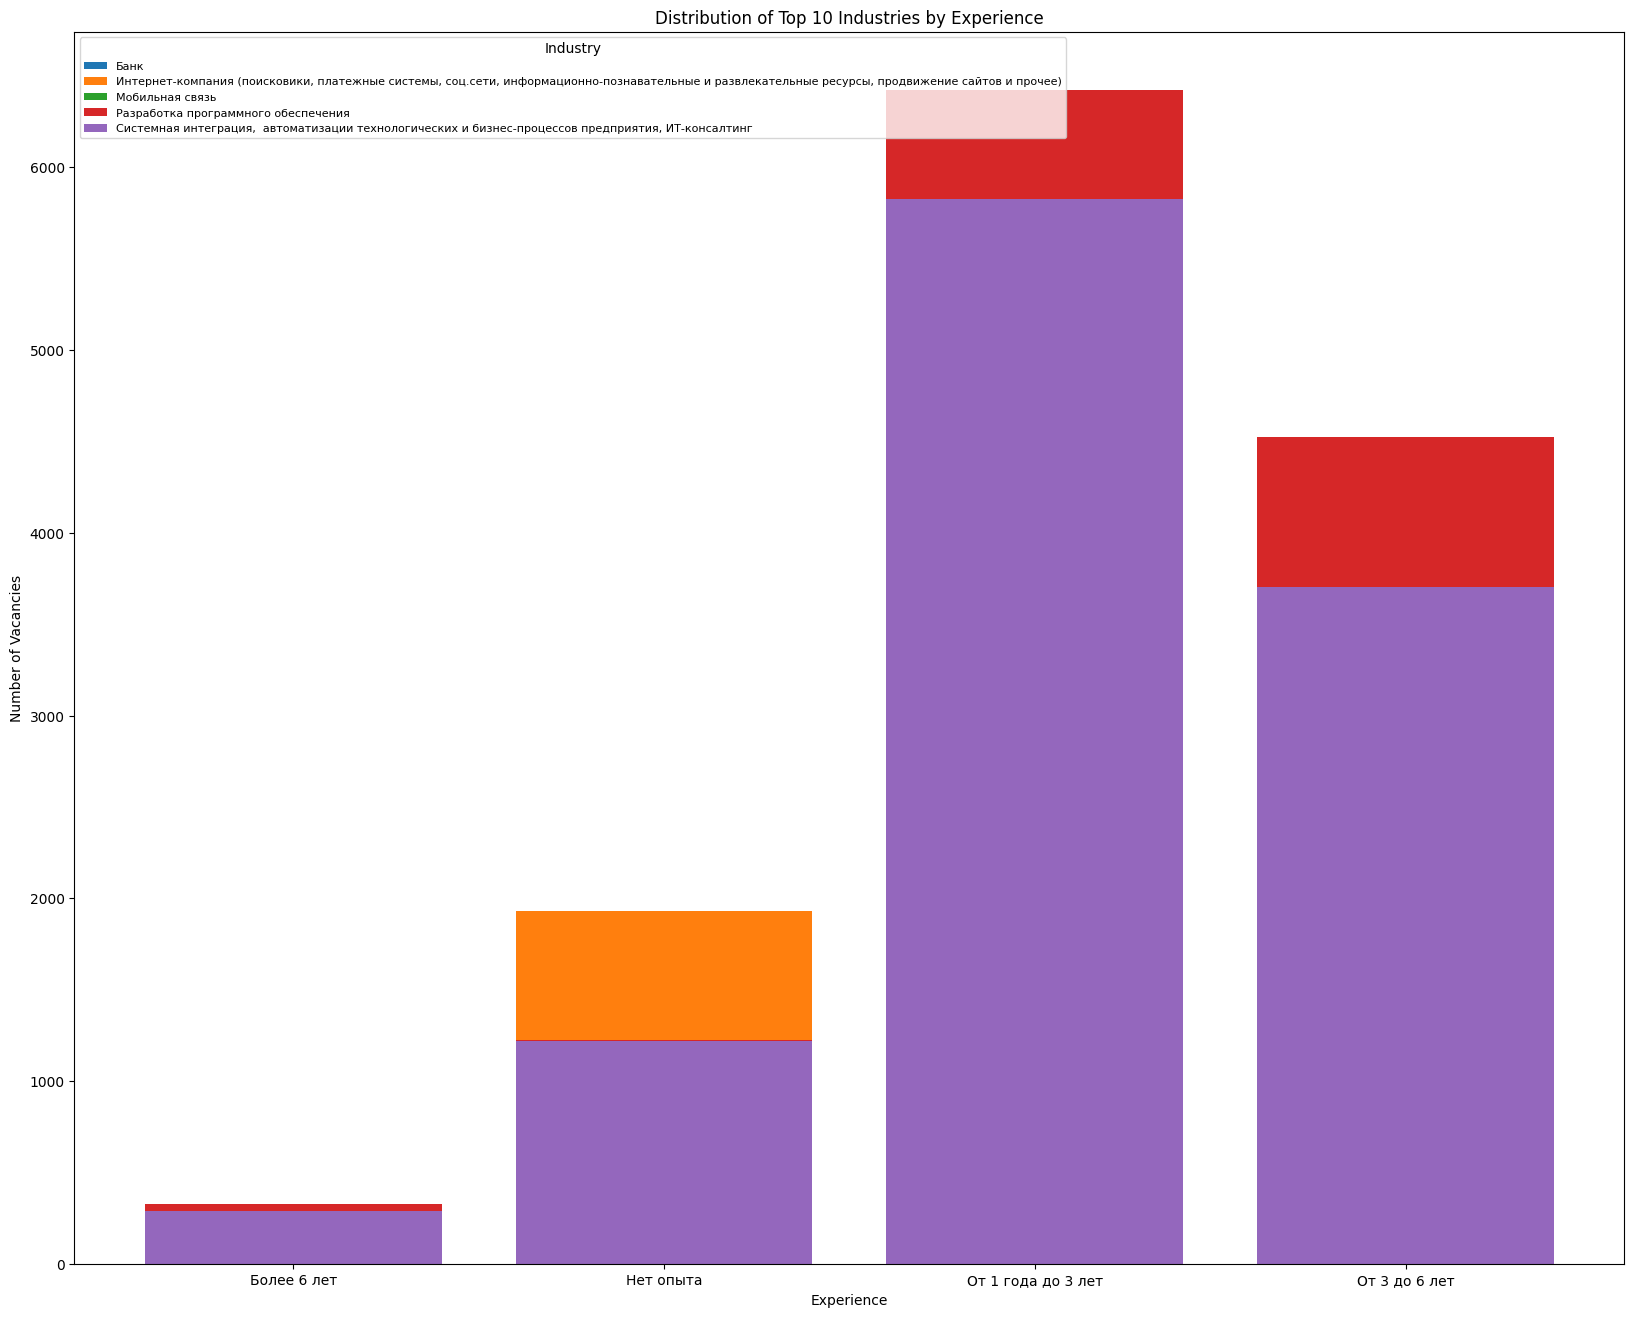

In [ ]:
query_expirience_extra=f'''
SELECT i.name AS industry_name, 
       v.experience, 
       COUNT(*) AS count_vacancies
FROM industries i
JOIN employers_industries ei ON i.id = ei.industry_id
JOIN vacancies v ON ei.employer_id = v.employer_id
GROUP BY i.name, v.experience
ORDER BY i.name, v.experience;
'''
df_expirience=pd.read_sql_query(query_expirience_extra, connection)
print(df_expirience)

import pandas as pd
import matplotlib.pyplot as plt

# Найдем 10 самых популярных сфер
top_industries = df_expirience.groupby('industry_name')['count_vacancies'].sum().nlargest(5).index

# Отфильтруем DataFrame по этим сферам
df_filtered = df_expirience[df_expirience['industry_name'].isin(top_industries)]

# Построение графика
fig, ax = plt.subplots(figsize=(20, 16))

# Используем более разнообразную цветовую палитру
colors = plt.cm.viridis.colors

# Используем цвета из палитры
for i, (industry, group) in enumerate(df_filtered.groupby('industry_name')):
    ax.bar(group['experience'], group['count_vacancies'], label=industry)

ax.set_xlabel('Experience')
ax.set_ylabel('Number of Vacancies')
ax.set_title('Distribution of Top 10 Industries by Experience')
ax.legend(title='Industry', fontsize='small', loc='upper left', prop={'size':8})

plt.show()





***

In [ ]:
# выводы по предметному анализу

# Общий вывод по проекту

In [ ]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования